In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
"""
Steps:
1) Load the data from fashion_mnist
2) using matplotlib, visualize an image.
3) normalize the x train and x test data
4) reshape the x arrays to include a 4 dimension on the single channel
5) convert the y_train and y_test to be one-hot encoded for categorical analysis by keras
for keras, use this: 2d conv, filters 32, kernel 4,4
poolin 2,2
flatten
dense 128, relu
final dense layer 10 with softmax
compile with loss='categorical_crossentropy', optimizer='msprop', metrics=['accuracy']
finally test the accuracy
"""

"\nSteps:\n1) Load the data from fashion_mnist\n2) using matplotlib, visualize an image.\n3) normalize the x train and x test data\n4) reshape the x arrays to include a 4 dimension on the single channel\n5) convert the y_train and y_test to be one-hot encoded for categorical analysis by keras\nfor keras, use this: 2d conv, filters 32, kernel 4,4\npoolin 2,2\nflatten\ndense 128, relu\nfinal dense layer 10 with softmax\ncompile with loss='categorical_crossentropy', optimizer='msprop', metrics=['accuracy']\nfinally test the accuracy\n"

In [3]:
import numpy as np

In [4]:
# 1
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [11]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [7]:
# 2
img_show = x_train[0]

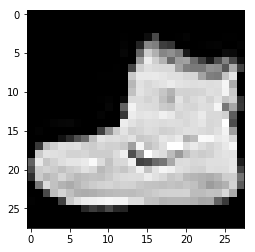

In [9]:
plt.imshow(img_show,cmap='gray')

In [12]:
# 3 
x_train,x_test = x_train/x_train.max(),x_test/x_test.max()

In [13]:
# 4
x_train.shape

(60000, 28, 28)

In [14]:
x_train = np.reshape(x_train, (60000,28,28,1))

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
x_test = np.reshape(x_test, (10000,28,28,1))

In [17]:
# 5. one-hot encoding

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [16]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
# 6 Creating the model 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_cat_train, verbose=1, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.4010 - acc: 0.8552
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2756 - acc: 0.8998
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2301 - acc: 0.9188
Epoch 4/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1981 - acc: 0.9276
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1744 - acc: 0.9372
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1530 - acc: 0.9450
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1355 - acc: 0.9519
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1207 - acc: 0.9586
Epoch 9/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1075 - acc: 0.9621
Epoch 10/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0953 - acc: 0.9668

In [31]:
#now, we evaluate the model
metrics = model.metrics_names
evaluate = model.evaluate(x_test,y_cat_test)

from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)

print("Metrics")
print(metrics)
print("Evaluate")
print(evaluate)
print(classification_report(y_test,predictions))

10000/10000 [==============================] - 4s 427us/step
Metrics
['loss', 'acc']
Evaluate
[0.3918470359712839, 0.9006]
             precision    recall  f1-score   support

          0       0.87      0.83      0.85      1000
          1       0.98      0.97      0.98      1000
          2       0.83      0.87      0.85      1000
          3       0.87      0.92      0.90      1000
          4       0.89      0.79      0.83      1000
          5       0.98      0.97      0.97      1000
          6       0.71      0.76      0.74      1000
          7       0.95      0.96      0.96      1000
          8       0.98      0.97      0.97      1000
          9       0.96      0.96      0.96      1000

avg / total       0.90      0.90      0.90     10000



In [32]:
model.save('assessment_model.h5')

In [ ]:
from keras.utils.np_utils import to_categorical
y_cat_test 